#### Developing model Using single and multilinear, polinomial and 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
from sklearn.linear_model import LinearRegression

#### Linear Regression

In [6]:
lm=LinearRegression()

In [7]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
X=df[['highway-mpg']]
Y=df['price']

In [9]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
yhat=lm.predict(X)

In [40]:
yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [41]:
lm.intercept_

38423.3058581574

In [42]:
lm.coef_

array([-821.73337832])

In [43]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [44]:
lm1=LinearRegression()

In [45]:
X1=df[['engine-size']]
Y1=df['price']

In [46]:
lm1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
yhat1=lm1.predict(X1)

In [48]:
yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [49]:
lm1.intercept_

-7963.338906281042

In [50]:
lm1.coef_

array([166.86001569])

#### Multiple Linear Regression

In [51]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [52]:
lm1.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lm1.intercept_

-15806.62462632922

In [54]:
lm1.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### plotting

In [59]:
import seaborn as sns
%matplotlib inline 

(0, 48277.90275250862)

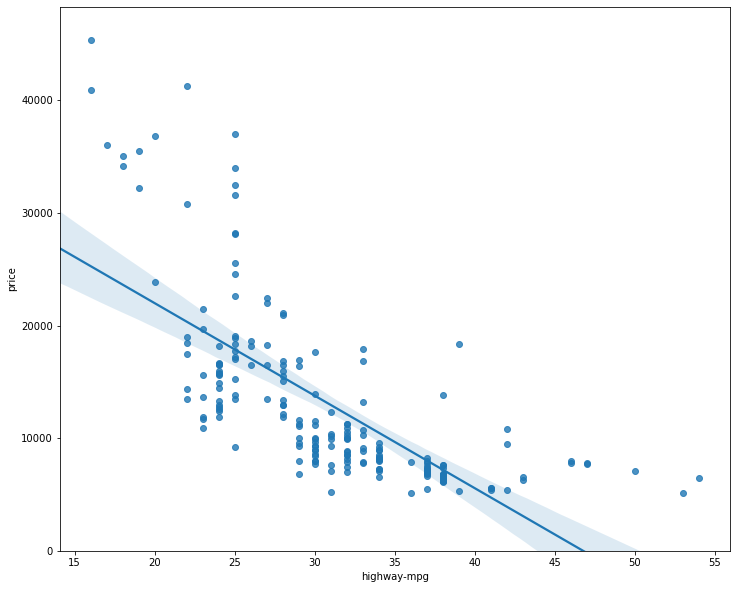

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

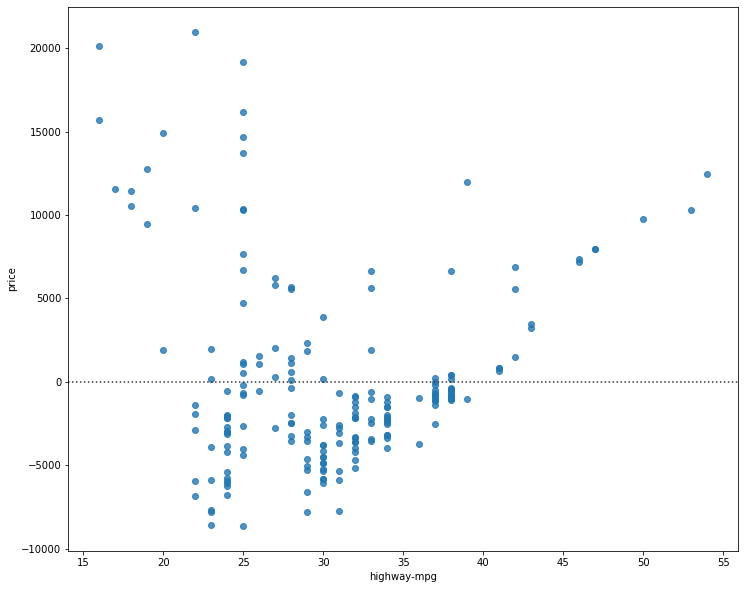

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

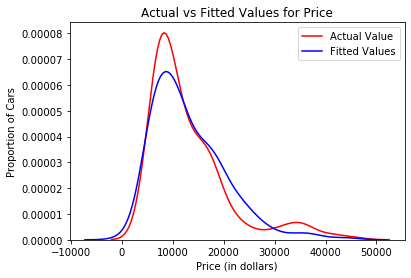

In [66]:
Yhat= lm1.predict(Z)
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Polynomial Regression

In [68]:
x = df['highway-mpg']
y = df['price']

In [69]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


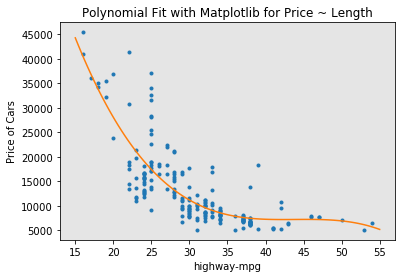

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [70]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

PlotPolly(p,x,y,'highway-mpg')
np.polyfit(x, y, 3)

In [71]:
g=np.polyfit(x,y,11)

In [72]:
h= np.poly1d(g)
h

poly1d([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640304e-02,
       -5.29740982e+00,  2.39470329e+02, -7.58845740e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140622e+07, -1.49106965e+08,  3.87930088e+08])

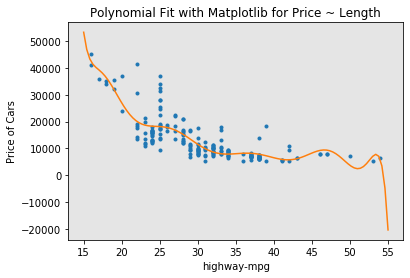

In [73]:
PlotPolly(h,x,y,'highway-mpg')

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pr=PolynomialFeatures(2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [76]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr=pr.fit_transform(Z)

In [77]:
Z.shape

(201, 4)

#### Using Pipelines for Pre-processing and model selection

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
input=[('scale',StandardScaler()),('polynomail',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [80]:
pipe=Pipeline(input)

In [81]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomail', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [82]:
ypipe=pipe.predict(Z)
ypipe[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [83]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
lm.score(X,Y)

0.4965911884339176

In [85]:
yhat=lm.predict(X)

In [86]:
yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
mse=mean_squared_error(df['price'],yhat)

In [89]:
mse

31635042.944639888

#### MSE

In [90]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
lm.score(Z,df['price'])

0.8093562806577457

In [92]:
multifit=lm.predict(Z)

In [93]:
mean_squared_error(df['price'], multifit)

11980366.87072649

In [94]:
from sklearn.metrics import r2_score

In [95]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
r2=r2_score(df['price'],p(x))

In [96]:
r2

0.674194666390652

In [97]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [98]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [99]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [100]:
X = df[['highway-mpg']]
Y = df['price']

In [101]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

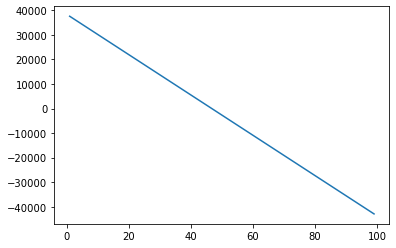

In [103]:
plt.plot(new_input, yhat)
plt.show()

#### Depending on the Scenario smallest MSE or MSE^2 would give us the best fit